# Stack Overflow Developer Survey 2025 Analysis
## Should We Build a TypeScript/JavaScript RedisVL Client Library?

This notebook analyzes the Stack Overflow Developer Survey 2025 data to determine if building a TypeScript/JavaScript version of RedisVL would be worthwhile.

### Key Questions:
1. How popular are JavaScript/TypeScript among developers?
2. What databases do JS/TS developers use?
3. How many JS/TS developers use Redis?
4. What's the overlap between JS/TS developers and AI/ML work?
5. What do developers value in technology adoption?

In [101]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

## 1. Load and Explore the Data

In [102]:
# Load the survey data
df = pd.read_csv('survey-data/survey_results_public.csv', low_memory=False)
schema = pd.read_csv('survey-data/survey_results_schema.csv')

print(f"Total responses: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nDataset shape: {df.shape}")

Total responses: 49,191
Total columns: 172

Dataset shape: (49191, 172)


In [103]:
# Display key columns related to our analysis
key_columns = [col for col in df.columns if any(x in col.lower() for x in ['language', 'database', 'devtype', 'ai'])]
print("Key columns for analysis:")
for col in key_columns:
    print(f"  - {col}")

Key columns for analysis:
  - MainBranch
  - LearnCodeAI
  - AILearnHow
  - DevType
  - AIThreat
  - LanguageChoice
  - LanguageHaveWorkedWith
  - LanguageWantToWorkWith
  - LanguageAdmired
  - LanguagesHaveEntry
  - LanguagesWantEntry
  - DatabaseChoice
  - DatabaseHaveWorkedWith
  - DatabaseWantToWorkWith
  - DatabaseAdmired
  - DatabaseHaveEntry
  - DatabaseWantEntry
  - AIModelsChoice
  - AIModelsHaveWorkedWith
  - AIModelsWantToWorkWith
  - AIModelsAdmired
  - AIModelsHaveEntry
  - AIModelsWantEntry
  - AISelect
  - AISent
  - AIAcc
  - AIComplex
  - AIToolCurrently partially AI
  - AIToolDon't plan to use AI for this task
  - AIToolPlan to partially use AI
  - AIToolPlan to mostly use AI
  - AIToolCurrently mostly AI
  - AIFrustration
  - AIExplain
  - AIAgents
  - AIAgentChange
  - AIAgent_Uses
  - AIAgentImpactSomewhat agree
  - AIAgentImpactNeutral
  - AIAgentImpactSomewhat disagree
  - AIAgentImpactStrongly agree
  - AIAgentImpactStrongly disagree
  - AIAgentChallengesNeutral

## 2. JavaScript/TypeScript Popularity Analysis

In [105]:
# Function to parse multi-select responses
def parse_multi_select(series):
    """Parse semicolon-separated multi-select responses"""
    all_items = []
    for value in series.dropna():
        if isinstance(value, str):
            items = [item.strip() for item in value.split(';')]
            all_items.extend(items)
    return Counter(all_items)

# Analyze languages developers have worked with
languages_worked = parse_multi_select(df['LanguageHaveWorkedWith'])
languages_want = parse_multi_select(df['LanguageWantToWorkWith'])

# Convert to DataFrame for easier analysis
lang_df = pd.DataFrame([
    {'Language': lang, 'Have Worked With': count, 'Want to Work With': languages_want.get(lang, 0)}
    for lang, count in languages_worked.most_common(20)
])

print("Top 20 Programming Languages:")
print(lang_df)

Top 20 Programming Languages:
                   Language  Have Worked With  Want to Work With
0                JavaScript             21005              10581
1                  HTML/CSS             19698              10661
2                       SQL             18633              11257
3                    Python             18410              12419
4   Bash/Shell (all shells)             15503               8662
5                TypeScript             13859              10099
6                      Java              9358               4981
7                        C#              8852               6117
8                       C++              7485               5243
9                PowerShell              7371               3014
10                        C              6987               4548
11                      PHP              5994               2873
12                       Go              5219               7414
13                     Rust              4724               

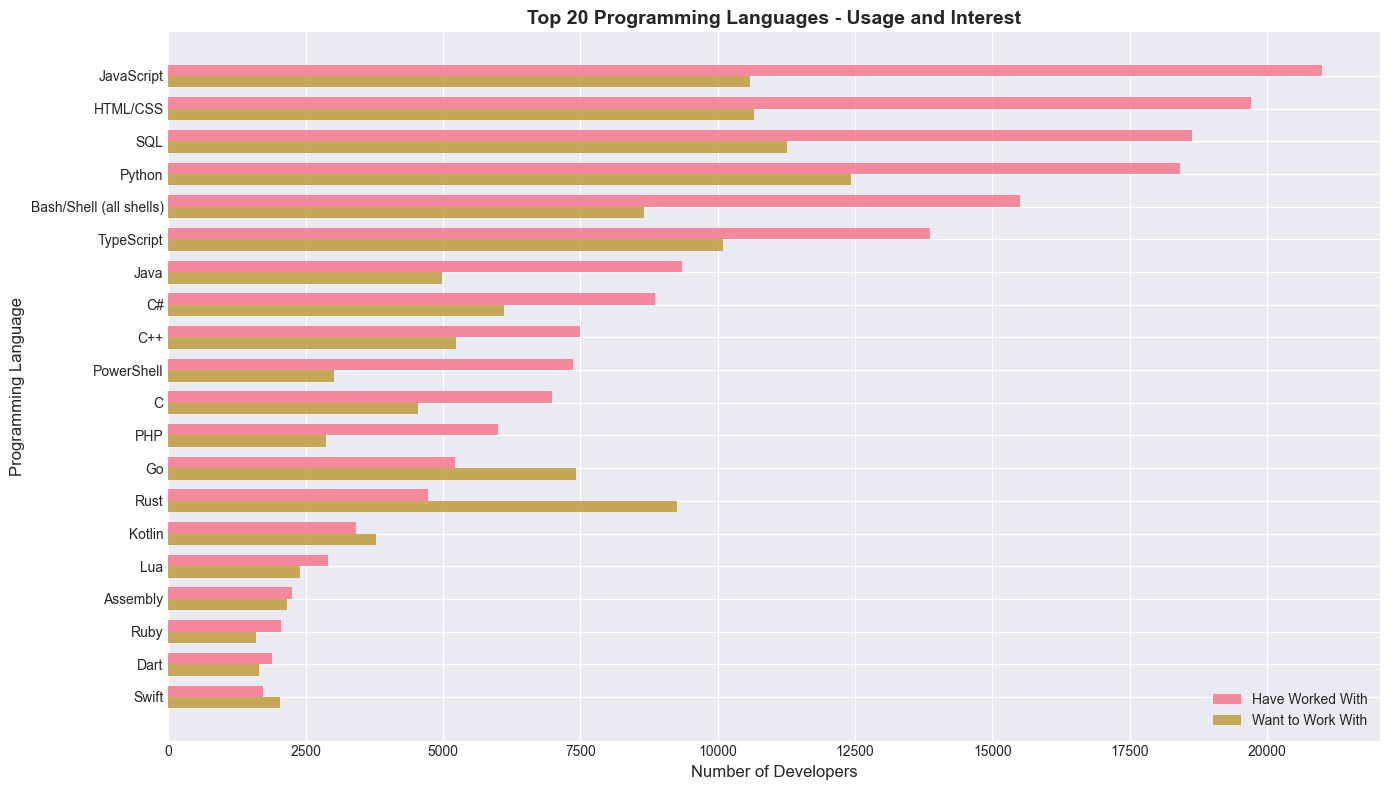

In [106]:
# Visualize top languages with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Have Worked With',
    y=lang_df['Language'],
    x=lang_df['Have Worked With'],
    orientation='h',
    marker=dict(color='steelblue', opacity=0.8),
    text=[f'{v:,}' for v in lang_df['Have Worked With']],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Have Worked With: %{x:,}<extra></extra>'
))

fig.add_trace(go.Bar(
    name='Want to Work With',
    y=lang_df['Language'],
    x=lang_df['Want to Work With'],
    orientation='h',
    marker=dict(color='coral', opacity=0.8),
    text=[f'{v:,}' for v in lang_df['Want to Work With']],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Want to Work With: %{x:,}<extra></extra>'
))

fig.update_layout(
    title='Top 20 Programming Languages - Usage and Interest',
    xaxis_title='Number of Developers',
    yaxis_title='Programming Language',
    barmode='group',
    height=800,
    font=dict(size=12),
    hovermode='y unified',
    yaxis=dict(autorange='reversed')
)

fig.show()

In [107]:
# Calculate JS/TS market share
total_responses = df['LanguageHaveWorkedWith'].notna().sum()
js_users = df['LanguageHaveWorkedWith'].str.contains('JavaScript', na=False).sum()
ts_users = df['LanguageHaveWorkedWith'].str.contains('TypeScript', na=False).sum()
js_or_ts_users = df['LanguageHaveWorkedWith'].str.contains('JavaScript|TypeScript', na=False).sum()

print(f"\n{'='*60}")
print("JavaScript/TypeScript Market Analysis")
print(f"{'='*60}")
print(f"Total developers who answered language question: {total_responses:,}")
print(f"JavaScript users: {js_users:,} ({js_users/total_responses*100:.1f}%)")
print(f"TypeScript users: {ts_users:,} ({ts_users/total_responses*100:.1f}%)")
print(f"JavaScript OR TypeScript users: {js_or_ts_users:,} ({js_or_ts_users/total_responses*100:.1f}%)")
print(f"{'='*60}")


JavaScript/TypeScript Market Analysis
Total developers who answered language question: 31,671
JavaScript users: 21,005 (66.3%)
TypeScript users: 13,859 (43.8%)
JavaScript OR TypeScript users: 22,557 (71.2%)


## 3. Database Usage Analysis

In [108]:
# Analyze database usage
databases_worked = parse_multi_select(df['DatabaseHaveWorkedWith'])
databases_want = parse_multi_select(df['DatabaseWantToWorkWith'])

# Convert to DataFrame
db_df = pd.DataFrame([
    {'Database': db, 'Have Worked With': count, 'Want to Work With': databases_want.get(db, 0)}
    for db, count in databases_worked.most_common(20)
])

print("Top 20 Databases:")
print(db_df)

Top 20 Databases:
                      Database  Have Worked With  Want to Work With
0                   PostgreSQL             14529              11863
1                        MySQL             10581               5120
2                       SQLite              9798               7185
3         Microsoft SQL Server              7871               3851
4                        Redis              7316               6014
5                      MongoDB              6267               4421
6                      MariaDB              5862               3239
7                Elasticsearch              4347               3288
8                       Oracle              2761               1259
9                     Dynamodb              2551               1741
10                    BigQuery              1705               1371
11                    Supabase              1558               1621
12             Cloud Firestore              1494                980
13                          H2

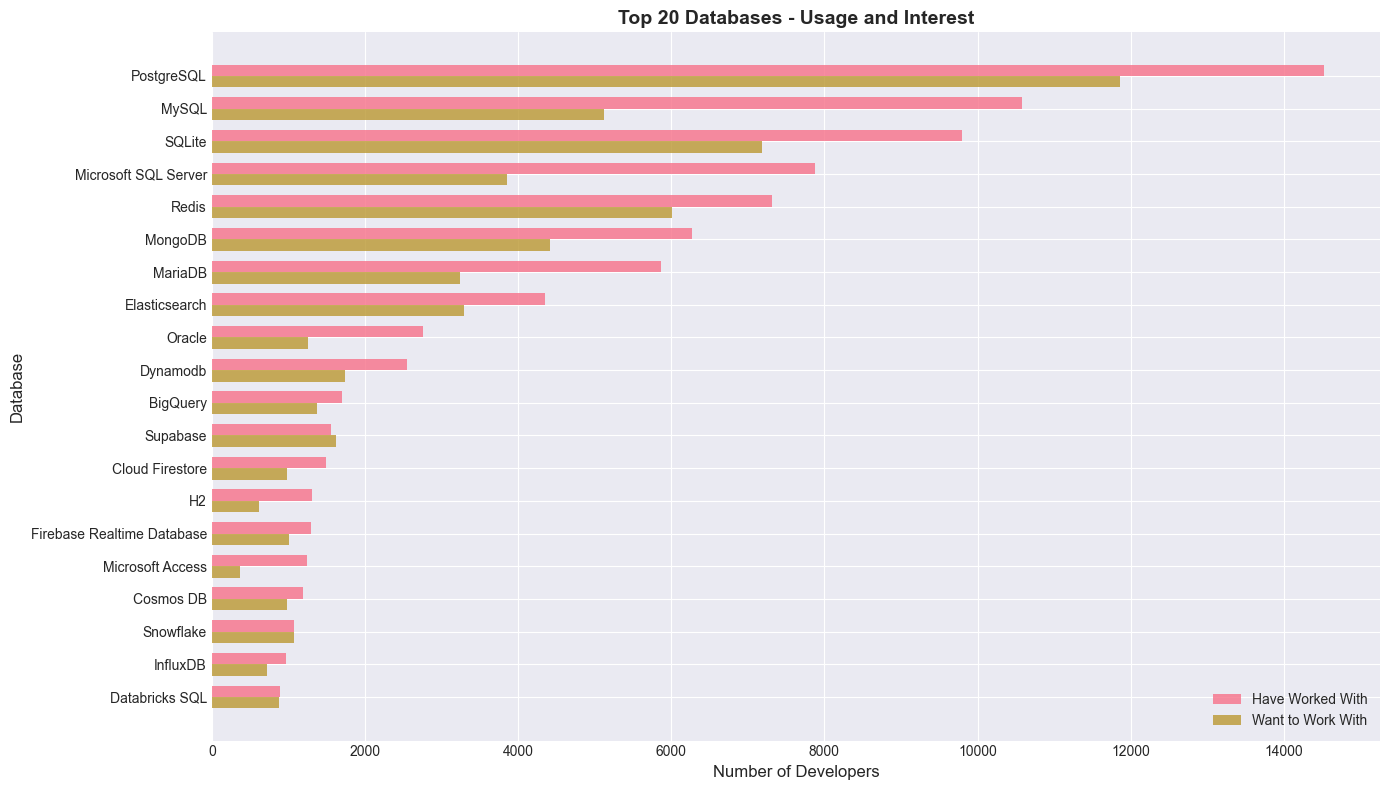

In [109]:
# Visualize database usage with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Have Worked With',
    y=db_df['Database'],
    x=db_df['Have Worked With'],
    orientation='h',
    marker=dict(color='steelblue', opacity=0.8),
    text=[f'{v:,}' for v in db_df['Have Worked With']],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Have Worked With: %{x:,}<extra></extra>'
))

fig.add_trace(go.Bar(
    name='Want to Work With',
    y=db_df['Database'],
    x=db_df['Want to Work With'],
    orientation='h',
    marker=dict(color='coral', opacity=0.8),
    text=[f'{v:,}' for v in db_df['Want to Work With']],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Want to Work With: %{x:,}<extra></extra>'
))

fig.update_layout(
    title='Top 20 Databases - Usage and Interest',
    xaxis_title='Number of Developers',
    yaxis_title='Database',
    barmode='group',
    height=800,
    font=dict(size=12),
    hovermode='y unified',
    yaxis=dict(autorange='reversed')
)

fig.show()

In [110]:
# Redis usage statistics
total_db_responses = df['DatabaseHaveWorkedWith'].notna().sum()
redis_users = df['DatabaseHaveWorkedWith'].str.contains('Redis', na=False, case=False).sum()

print(f"\n{'='*60}")
print("Redis Usage Analysis")
print(f"{'='*60}")
print(f"Total developers who answered database question: {total_db_responses:,}")
print(f"Redis users: {redis_users:,} ({redis_users/total_db_responses*100:.1f}%)")
print(f"{'='*60}")


Redis Usage Analysis
Total developers who answered database question: 25,550
Redis users: 7,316 (28.6%)


## 4. JS/TS Developers + Redis: The Broader Market

In [114]:
# Identify JS/TS developers who use Redis
js_ts_mask = df['LanguageHaveWorkedWith'].str.contains('JavaScript|TypeScript', na=False)
redis_mask = df['DatabaseHaveWorkedWith'].str.contains('Redis', na=False, case=False)

js_ts_developers = df[js_ts_mask]
js_ts_redis_developers = df[js_ts_mask & redis_mask]

# Identify Python developers (for comparison - RedisVL already exists for Python)
python_mask = df['LanguageHaveWorkedWith'].str.contains('Python', na=False)
python_developers = df[python_mask]
python_redis_developers = df[python_mask & redis_mask]

# Identify Java developers (for comparison - RedisVL already exists for Java)
java_mask = df['LanguageHaveWorkedWith'].str.contains('Java', na=False)
java_developers = df[java_mask]
java_redis_developers = df[java_mask & redis_mask]

print(f"\n{'='*60}")
print("Target Market Analysis: JS/TS + Redis")
print(f"{'='*60}")
print(f"Total JS/TS developers: {len(js_ts_developers):,}")
print(f"JS/TS developers using Redis: {len(js_ts_redis_developers):,}")
print(f"Percentage of JS/TS devs using Redis: {len(js_ts_redis_developers)/len(js_ts_developers)*100:.1f}%")
print(f"\nPotential market size: {len(js_ts_redis_developers):,} developers")
print(f"{'='*60}")


Target Market Analysis: JS/TS + Redis
Total JS/TS developers: 22,557
JS/TS developers using Redis: 6,138
Percentage of JS/TS devs using Redis: 27.2%

Potential market size: 6,138 developers


In [115]:
# What other databases do JS/TS + Redis developers use?
js_ts_redis_db_usage = parse_multi_select(js_ts_redis_developers['DatabaseHaveWorkedWith'])

print("\nTop databases used by JS/TS + Redis developers:")
for db, count in js_ts_redis_db_usage.most_common(15):
    percentage = (count / len(js_ts_redis_developers)) * 100
    print(f"  {db:30s}: {count:6,} ({percentage:5.1f}%)")


Top databases used by JS/TS + Redis developers:
  Redis                         :  6,138 (100.0%)
  PostgreSQL                    :  4,721 ( 76.9%)
  MySQL                         :  3,112 ( 50.7%)
  SQLite                        :  2,976 ( 48.5%)
  MongoDB                       :  2,300 ( 37.5%)
  Elasticsearch                 :  1,995 ( 32.5%)
  MariaDB                       :  1,961 ( 31.9%)
  Microsoft SQL Server          :  1,605 ( 26.1%)
  Dynamodb                      :  1,042 ( 17.0%)
  Supabase                      :    644 ( 10.5%)
  BigQuery                      :    622 ( 10.1%)
  Oracle                        :    540 (  8.8%)
  Cloud Firestore               :    492 (  8.0%)
  InfluxDB                      :    430 (  7.0%)
  Firebase Realtime Database    :    429 (  7.0%)


## 5. Node.js Analysis

In [116]:
# Analyze Node.js usage (backend JavaScript/TypeScript)
webframe_worked = parse_multi_select(df['WebframeHaveWorkedWith'])
webframe_want = parse_multi_select(df['WebframeWantToWorkWith'])

print("Top Web Frameworks/Platforms:")
for framework, count in webframe_worked.most_common(20):
    want_count = webframe_want.get(framework, 0)
    print(f"  {framework:30s}: {count:6,} (want: {want_count:6,})")

Top Web Frameworks/Platforms:
  Node.js                       : 11,544 (want:  6,806)
  React                         : 10,596 (want:  7,024)
  jQuery                        :  5,541 (want:  2,015)
  Next.js                       :  4,933 (want:  3,427)
  Express                       :  4,710 (want:  2,621)
  ASP.NET Core                  :  4,664 (want:  3,361)
  Angular                       :  4,319 (want:  2,858)
  Vue.js                        :  4,162 (want:  3,516)
  FastAPI                       :  3,504 (want:  2,922)
  Spring Boot                   :  3,481 (want:  2,511)
  Flask                         :  3,406 (want:  1,955)
  ASP.NET                       :  3,360 (want:  1,443)
  WordPress                     :  3,227 (want:  1,255)
  Django                        :  2,980 (want:  2,302)
  Laravel                       :  2,111 (want:  1,502)
  AngularJS                     :  1,718 (want:    835)
  Svelte                        :  1,717 (want:  2,542)
  Blazor          

In [117]:
# Identify Node.js developers
nodejs_mask = df['WebframeHaveWorkedWith'].str.contains('Node.js', na=False, case=False)
nodejs_developers = df[nodejs_mask]

# Node.js + Redis developers (THE REAL TARGET MARKET)
nodejs_redis_developers = df[nodejs_mask & redis_mask]

print(f"\n{'='*70}")
print("🎯 THE REAL TARGET MARKET: Node.js + Redis Developers")
print(f"{'='*70}")
print(f"\nTotal Node.js developers: {len(nodejs_developers):,}")
print(f"Node.js developers using Redis: {len(nodejs_redis_developers):,}")
print(f"Redis adoption among Node.js devs: {len(nodejs_redis_developers)/len(nodejs_developers)*100:.1f}%")
print(f"\n🎯 PRIMARY TARGET MARKET SIZE: {len(nodejs_redis_developers):,} developers")
print(f"{'='*70}")


🎯 THE REAL TARGET MARKET: Node.js + Redis Developers

Total Node.js developers: 11,544
Node.js developers using Redis: 3,734
Redis adoption among Node.js devs: 32.3%

🎯 PRIMARY TARGET MARKET SIZE: 3,734 developers


In [118]:
# Compare Node.js vs general JS/TS
print(f"\n{'='*70}")
print("Node.js vs General JS/TS Comparison")
print(f"{'='*70}")
print(f"\nGeneral JS/TS developers: {len(js_ts_developers):,}")
print(f"  - Using Redis: {len(js_ts_redis_developers):,} ({len(js_ts_redis_developers)/len(js_ts_developers)*100:.1f}%)")
print(f"\nNode.js developers (backend): {len(nodejs_developers):,}")
print(f"  - Using Redis: {len(nodejs_redis_developers):,} ({len(nodejs_redis_developers)/len(nodejs_developers)*100:.1f}%)")
print(f"\n💡 Node.js developers are {len(nodejs_developers)/len(js_ts_developers)*100:.1f}% of all JS/TS developers")
print(f"💡 Node.js + Redis is {len(nodejs_redis_developers)/len(js_ts_redis_developers)*100:.1f}% of JS/TS + Redis market")
print(f"{'='*70}")


Node.js vs General JS/TS Comparison

General JS/TS developers: 22,557
  - Using Redis: 6,138 (27.2%)

Node.js developers (backend): 11,544
  - Using Redis: 3,734 (32.3%)

💡 Node.js developers are 51.2% of all JS/TS developers
💡 Node.js + Redis is 60.8% of JS/TS + Redis market


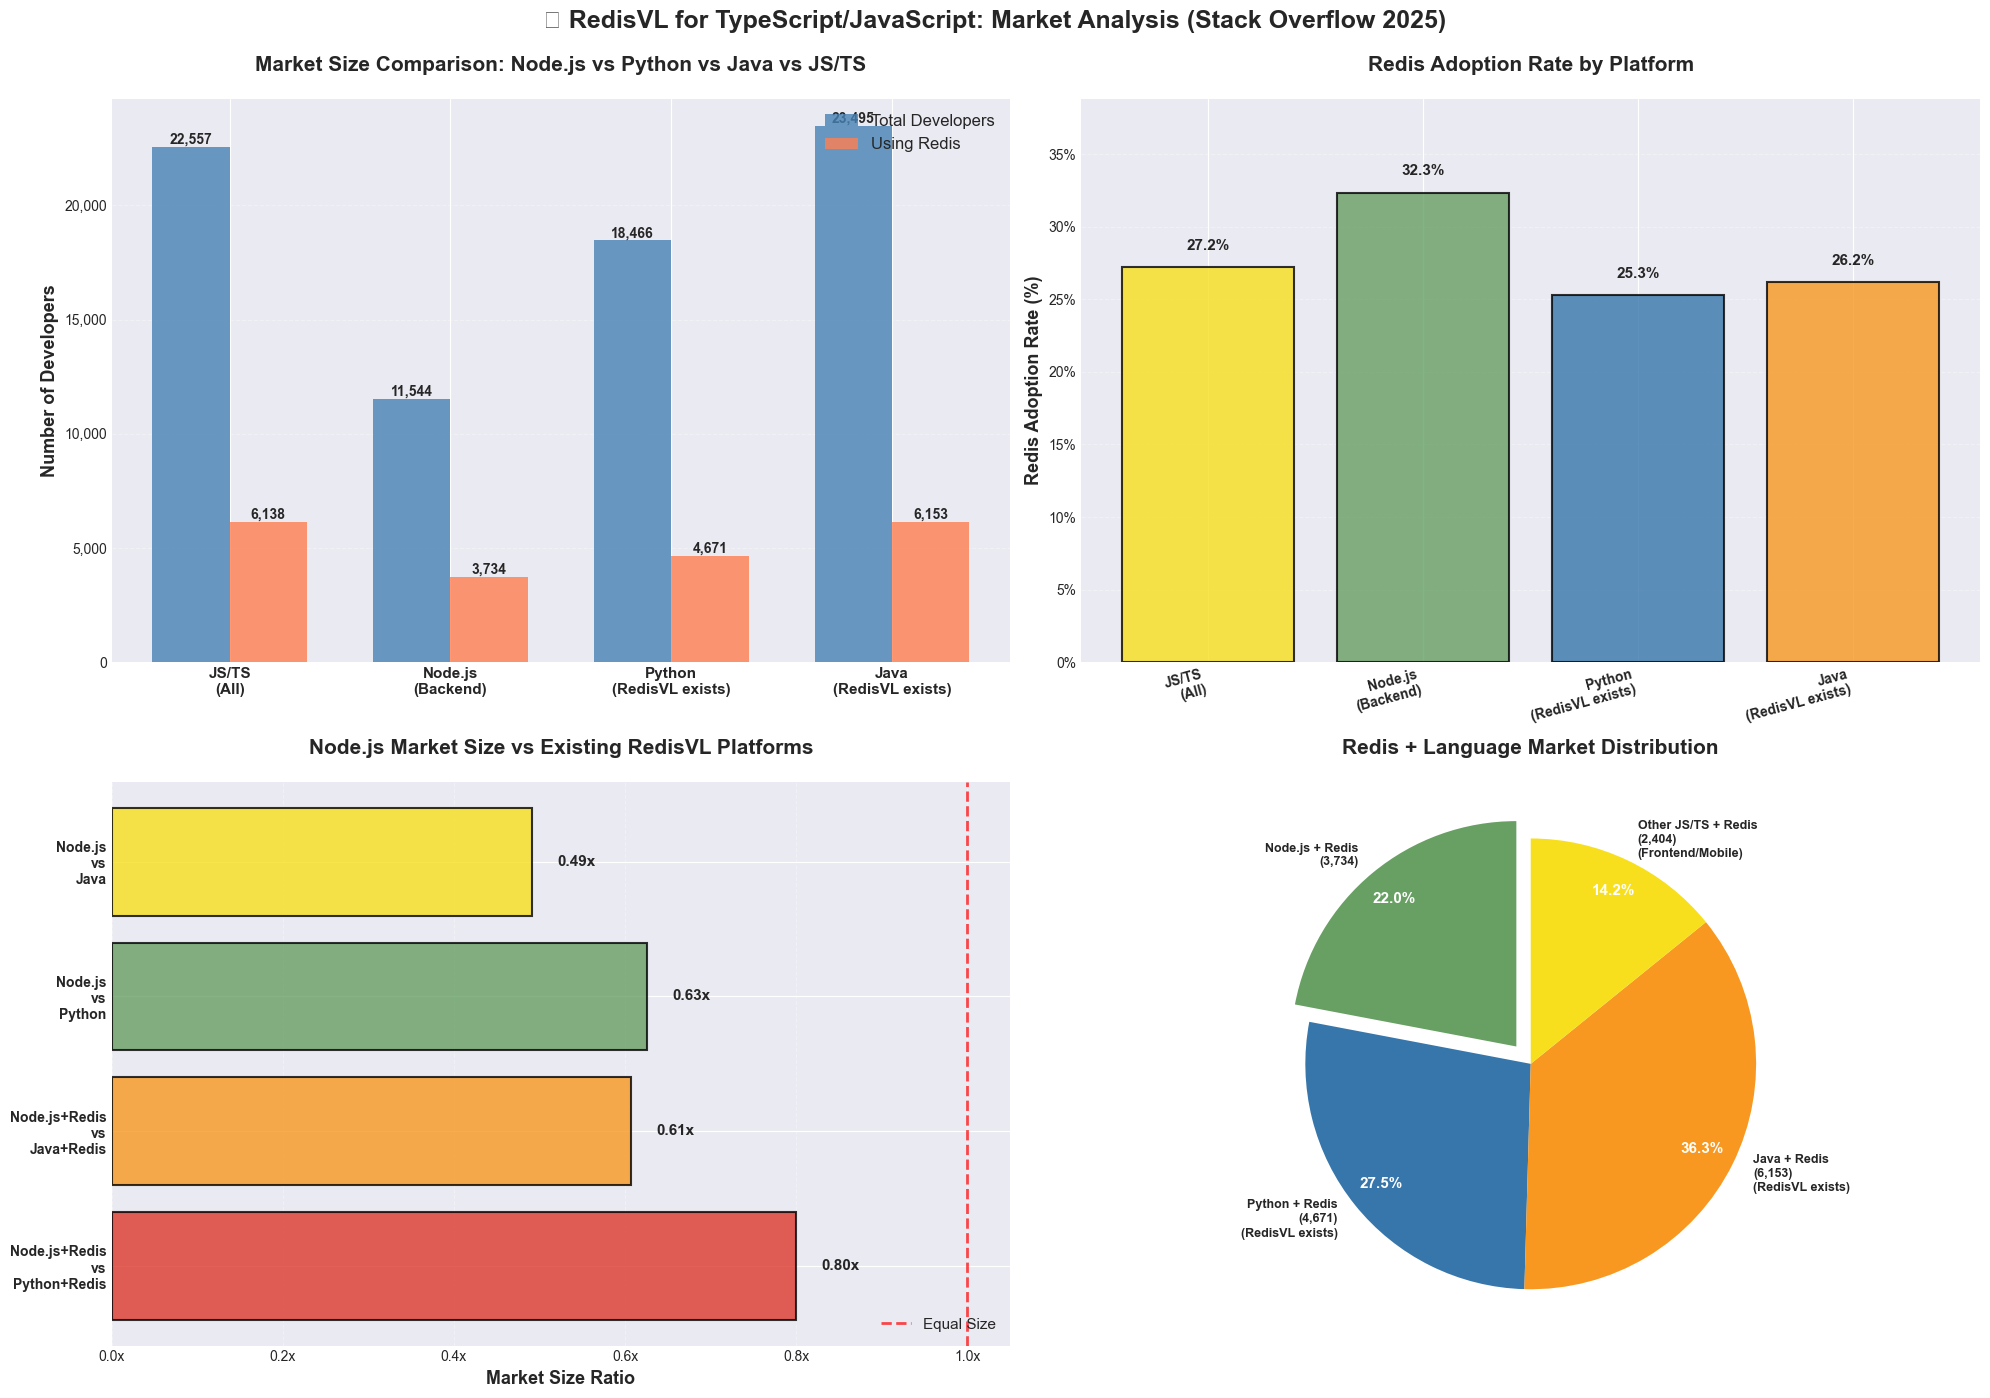

In [119]:
# Visualize the comparison: Node.js vs Python vs Java vs General JS/TS
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Chart 1: Total developers comparison
categories = ['JS/TS\n(All)', 'Node.js\n(Backend)', 'Python\n(RedisVL exists)', 'Java\n(RedisVL exists)']
total_counts = [len(js_ts_developers), len(nodejs_developers), len(python_developers), len(java_developers)]
redis_counts = [len(js_ts_redis_developers), len(nodejs_redis_developers), len(python_redis_developers), len(java_redis_developers)]

x = np.arange(len(categories))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, total_counts, width, label='Total Developers', alpha=0.8, color='steelblue')
bars2 = axes[0, 0].bar(x + width/2, redis_counts, width, label='Using Redis', alpha=0.8, color='coral')

axes[0, 0].set_ylabel('Number of Developers', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Market Size Comparison: Node.js vs Python vs Java vs JS/TS', fontsize=15, fontweight='bold', pad=20)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(categories, fontsize=11, fontweight='bold')
axes[0, 0].legend(fontsize=12, loc='upper right')
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}',
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart 2: Redis adoption rates
adoption_rates = [
    len(js_ts_redis_developers)/len(js_ts_developers)*100,
    len(nodejs_redis_developers)/len(nodejs_developers)*100,
    len(python_redis_developers)/len(python_developers)*100,
    len(java_redis_developers)/len(java_developers)*100
]

bars = axes[0, 1].bar(categories, adoption_rates, color=['#f7df1e', '#68a063', '#3776ab', '#f89820'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Redis Adoption Rate (%)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Redis Adoption Rate by Platform', fontsize=15, fontweight='bold', pad=20)
axes[0, 1].set_xticklabels(categories, fontsize=10, fontweight='bold', rotation=15, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 1].set_ylim(0, max(adoption_rates) * 1.2)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

for i, (bar, v) in enumerate(zip(bars, adoption_rates)):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., v + 1, 
                   f'{v:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Chart 3: Market size ratios (comparing with both Python and Java)
market_ratios = [
    ('Node.js+Redis\nvs\nPython+Redis', len(nodejs_redis_developers)/len(python_redis_developers)),
    ('Node.js+Redis\nvs\nJava+Redis', len(nodejs_redis_developers)/len(java_redis_developers)),
    ('Node.js\nvs\nPython', len(nodejs_developers)/len(python_developers)),
    ('Node.js\nvs\nJava', len(nodejs_developers)/len(java_developers)),
]

labels = [x[0] for x in market_ratios]
ratios = [x[1] for x in market_ratios]
colors_map = ['#dc382d', '#f89820', '#68a063', '#f7df1e']

bars = axes[1, 0].barh(labels, ratios, color=colors_map, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Market Size Ratio', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Node.js Market Size vs Existing RedisVL Platforms', fontsize=15, fontweight='bold', pad=20)
axes[1, 0].axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Equal Size', alpha=0.7)
axes[1, 0].legend(fontsize=11, loc='lower right')
axes[1, 0].grid(axis='x', alpha=0.3, linestyle='--')
axes[1, 0].set_yticklabels(labels, fontsize=10, fontweight='bold')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}x'))

for i, (bar, v) in enumerate(zip(bars, ratios)):
    axes[1, 0].text(v + 0.03, bar.get_y() + bar.get_height()/2., 
                   f'{v:.2f}x', va='center', fontsize=11, fontweight='bold')

# Chart 4: Target market breakdown
target_markets = [
    f'Node.js + Redis\n({len(nodejs_redis_developers):,})',
    f'Python + Redis\n({len(python_redis_developers):,})\n(RedisVL exists)',
    f'Java + Redis\n({len(java_redis_developers):,})\n(RedisVL exists)',
    f'Other JS/TS + Redis\n({len(js_ts_redis_developers) - len(nodejs_redis_developers):,})\n(Frontend/Mobile)'
]
target_counts = [
    len(nodejs_redis_developers),
    len(python_redis_developers),
    len(java_redis_developers),
    len(js_ts_redis_developers) - len(nodejs_redis_developers)
]

colors_pie = ['#68a063', '#3776ab', '#f89820', '#f7df1e']
explode = (0.1, 0, 0, 0)  # Explode the Node.js slice

wedges, texts, autotexts = axes[1, 1].pie(target_counts, labels=target_markets, autopct='%1.1f%%',
                                           colors=colors_pie, explode=explode, startangle=90,
                                           textprops={'fontsize': 9, 'fontweight': 'bold'},
                                           pctdistance=0.85)
axes[1, 1].set_title('Redis + Language Market Distribution', fontsize=15, fontweight='bold', pad=20)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

plt.suptitle('🎯 RedisVL for TypeScript/JavaScript: Market Analysis (Stack Overflow 2025)', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [120]:
# What other technologies do Node.js + Redis developers use?
print("\n" + "="*70)
print("🔧 Technology Stack of Node.js + Redis Developers")
print("="*70)

# Languages
nodejs_redis_langs = parse_multi_select(nodejs_redis_developers['LanguageHaveWorkedWith'])
print("\n📝 Top Languages:")
for lang, count in nodejs_redis_langs.most_common(10):
    percentage = (count / len(nodejs_redis_developers)) * 100
    print(f"  {lang:25s}: {count:5,} ({percentage:5.1f}%)")

# Databases
nodejs_redis_dbs = parse_multi_select(nodejs_redis_developers['DatabaseHaveWorkedWith'])
print("\n💾 Top Databases:")
for db, count in nodejs_redis_dbs.most_common(10):
    percentage = (count / len(nodejs_redis_developers)) * 100
    print(f"  {db:25s}: {count:5,} ({percentage:5.1f}%)")

# Web Frameworks
nodejs_redis_webframes = parse_multi_select(nodejs_redis_developers['WebframeHaveWorkedWith'])
print("\n🌐 Top Web Frameworks:")
for framework, count in nodejs_redis_webframes.most_common(10):
    percentage = (count / len(nodejs_redis_developers)) * 100
    print(f"  {framework:25s}: {count:5,} ({percentage:5.1f}%)")


🔧 Technology Stack of Node.js + Redis Developers

📝 Top Languages:
  JavaScript               : 3,445 ( 92.3%)
  HTML/CSS                 : 3,050 ( 81.7%)
  TypeScript               : 2,992 ( 80.1%)
  SQL                      : 2,859 ( 76.6%)
  Python                   : 2,414 ( 64.6%)
  Bash/Shell (all shells)  : 2,276 ( 61.0%)
  Java                     : 1,265 ( 33.9%)
  PHP                      : 1,170 ( 31.3%)
  Go                       : 1,166 ( 31.2%)
  C#                       : 1,037 ( 27.8%)

💾 Top Databases:
  Redis                    : 3,734 (100.0%)
  PostgreSQL               : 2,951 ( 79.0%)
  MySQL                    : 2,003 ( 53.6%)
  SQLite                   : 1,891 ( 50.6%)
  MongoDB                  : 1,706 ( 45.7%)
  Elasticsearch            : 1,293 ( 34.6%)
  MariaDB                  : 1,267 ( 33.9%)
  Microsoft SQL Server     : 1,000 ( 26.8%)
  Dynamodb                 :   728 ( 19.5%)
  Supabase                 :   489 ( 13.1%)

🌐 Top Web Frameworks:
  Node.js  

In [121]:
# Developer roles for Node.js + Redis developers
nodejs_redis_dev_types = parse_multi_select(nodejs_redis_developers['DevType'])

print("\n" + "="*70)
print("👥 Developer Roles (Node.js + Redis Users)")
print("="*70)
print("\nThese are your PRIMARY target personas:\n")
for dev_type, count in nodejs_redis_dev_types.most_common(12):
    percentage = (count / len(nodejs_redis_developers)) * 100
    print(f"  {dev_type:45s}: {count:5,} ({percentage:5.1f}%)")


👥 Developer Roles (Node.js + Redis Users)

These are your PRIMARY target personas:

  Developer, full-stack                        : 1,663 ( 44.5%)
  Developer, back-end                          :   625 ( 16.7%)
  Architect, software or solutions             :   341 (  9.1%)
  Engineering manager                          :   157 (  4.2%)
  DevOps engineer or professional              :   120 (  3.2%)
  Developer, front-end                         :    97 (  2.6%)
  Student                                      :    96 (  2.6%)
  Senior executive (C-suite, VP, etc.)         :    84 (  2.2%)
  Other (please specify):                      :    82 (  2.2%)
  Founder, technology or otherwise             :    61 (  1.6%)
  Developer, desktop or enterprise applications:    50 (  1.3%)
  Cloud infrastructure engineer                :    39 (  1.0%)


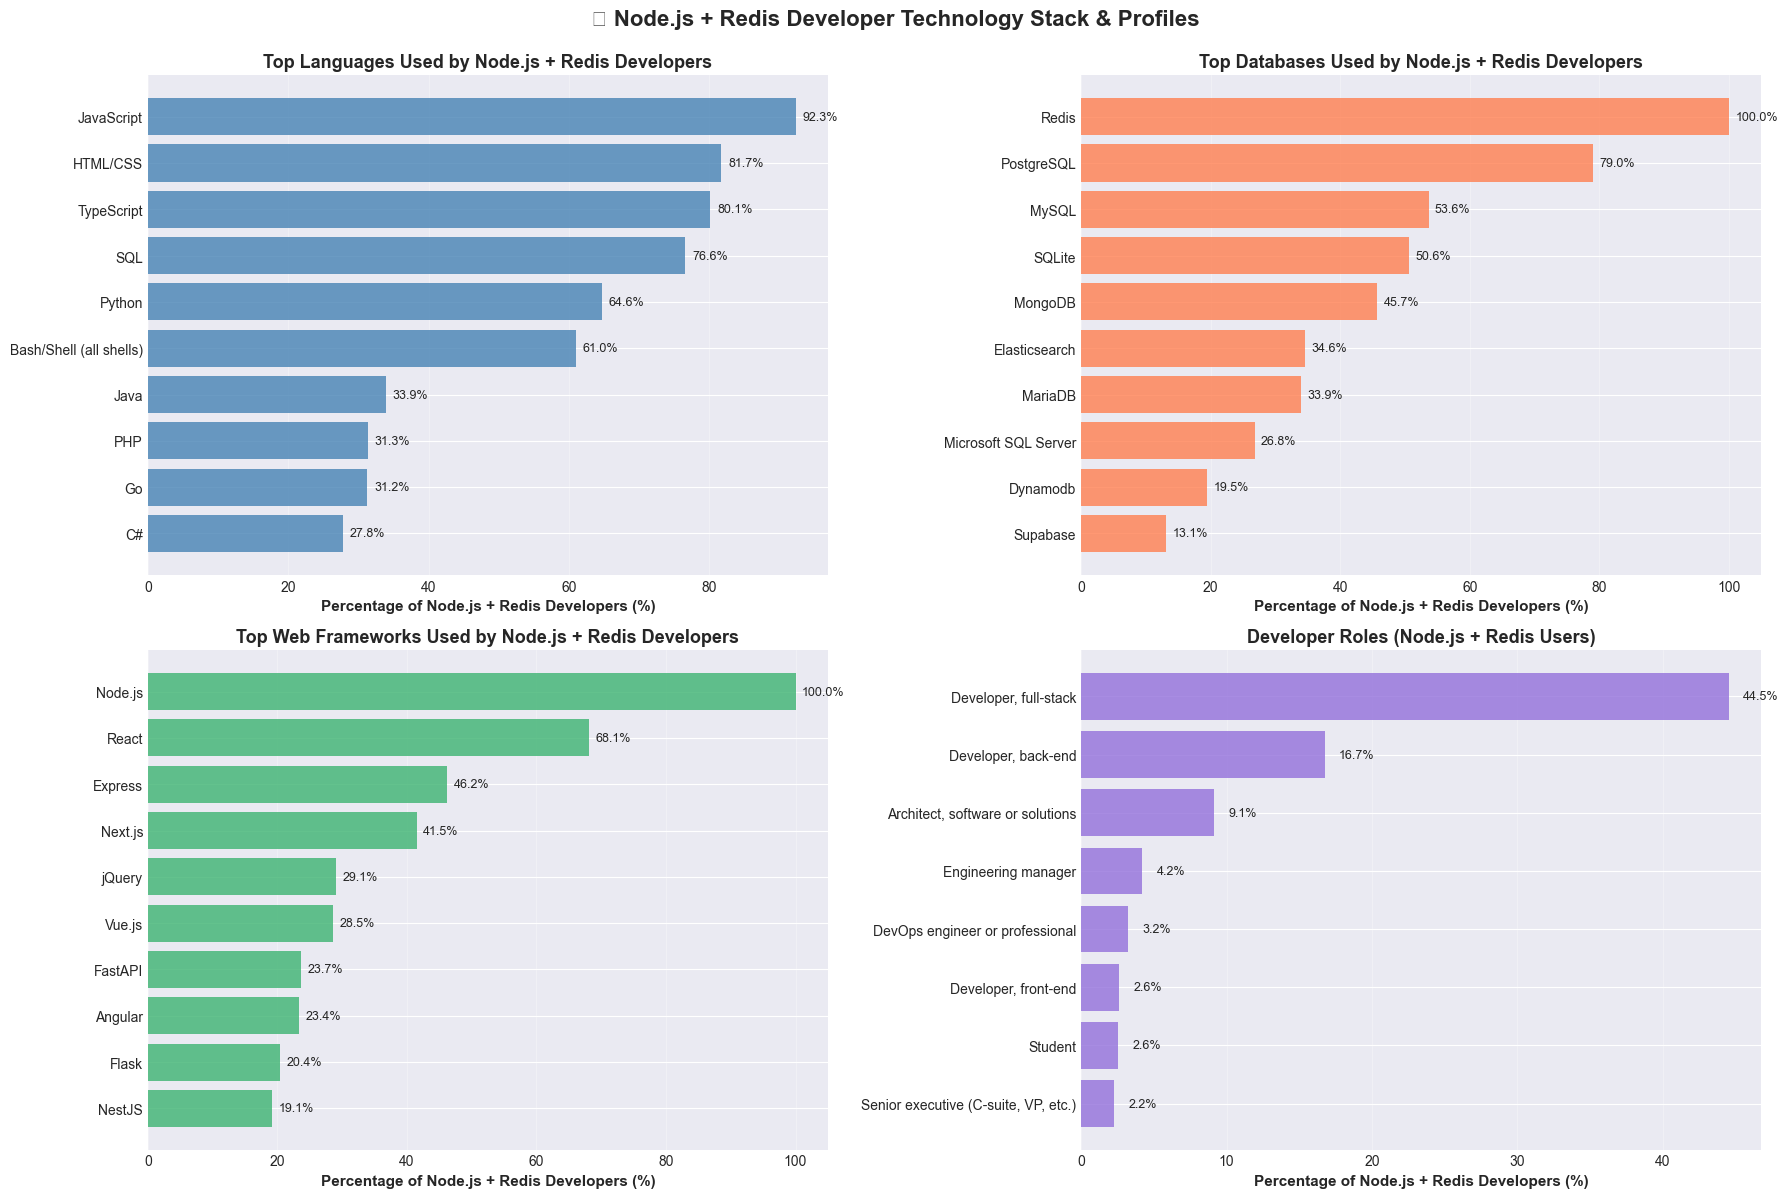

In [122]:
# Visualize Node.js + Redis developer tech stack
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Chart 1: Top Languages
top_langs = pd.DataFrame([
    {'Language': lang, 'Count': count, 'Percentage': (count/len(nodejs_redis_developers))*100}
    for lang, count in nodejs_redis_langs.most_common(10)
])

axes[0, 0].barh(range(len(top_langs)), top_langs['Percentage'], color='steelblue', alpha=0.8)
axes[0, 0].set_yticks(range(len(top_langs)))
axes[0, 0].set_yticklabels(top_langs['Language'])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Percentage of Node.js + Redis Developers (%)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Top Languages Used by Node.js + Redis Developers', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_langs['Percentage']):
    axes[0, 0].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

# Chart 2: Top Databases
top_dbs = pd.DataFrame([
    {'Database': db, 'Count': count, 'Percentage': (count/len(nodejs_redis_developers))*100}
    for db, count in nodejs_redis_dbs.most_common(10)
])

axes[0, 1].barh(range(len(top_dbs)), top_dbs['Percentage'], color='coral', alpha=0.8)
axes[0, 1].set_yticks(range(len(top_dbs)))
axes[0, 1].set_yticklabels(top_dbs['Database'])
axes[0, 1].invert_yaxis()
axes[0, 1].set_xlabel('Percentage of Node.js + Redis Developers (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Top Databases Used by Node.js + Redis Developers', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_dbs['Percentage']):
    axes[0, 1].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

# Chart 3: Top Web Frameworks
top_frameworks = pd.DataFrame([
    {'Framework': fw, 'Count': count, 'Percentage': (count/len(nodejs_redis_developers))*100}
    for fw, count in nodejs_redis_webframes.most_common(10)
])

axes[1, 0].barh(range(len(top_frameworks)), top_frameworks['Percentage'], color='mediumseagreen', alpha=0.8)
axes[1, 0].set_yticks(range(len(top_frameworks)))
axes[1, 0].set_yticklabels(top_frameworks['Framework'])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Percentage of Node.js + Redis Developers (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Top Web Frameworks Used by Node.js + Redis Developers', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_frameworks['Percentage']):
    axes[1, 0].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

# Chart 4: Top Developer Roles
top_roles = pd.DataFrame([
    {'Role': role, 'Count': count, 'Percentage': (count/len(nodejs_redis_developers))*100}
    for role, count in nodejs_redis_dev_types.most_common(8)
])

axes[1, 1].barh(range(len(top_roles)), top_roles['Percentage'], color='mediumpurple', alpha=0.8)
axes[1, 1].set_yticks(range(len(top_roles)))
axes[1, 1].set_yticklabels(top_roles['Role'], fontsize=10)
axes[1, 1].invert_yaxis()
axes[1, 1].set_xlabel('Percentage of Node.js + Redis Developers (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Developer Roles (Node.js + Redis Users)', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_roles['Percentage']):
    axes[1, 1].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

plt.suptitle('🎯 Node.js + Redis Developer Technology Stack & Profiles', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 7. AI/ML Usage Among Node.js Developers

In [123]:
# Check AI tool usage columns
ai_columns = [col for col in df.columns if 'AI' in col or 'ai' in col.lower()]
print("AI-related columns in the dataset:")
for col in ai_columns:
    print(f"  - {col}")

AI-related columns in the dataset:
  - MainBranch
  - LearnCodeAI
  - AILearnHow
  - AIThreat
  - AIModelsChoice
  - AIModelsHaveWorkedWith
  - AIModelsWantToWorkWith
  - AIModelsAdmired
  - AIModelsHaveEntry
  - AIModelsWantEntry
  - AISelect
  - AISent
  - AIAcc
  - AIComplex
  - AIToolCurrently partially AI
  - AIToolDon't plan to use AI for this task
  - AIToolPlan to partially use AI
  - AIToolPlan to mostly use AI
  - AIToolCurrently mostly AI
  - AIFrustration
  - AIExplain
  - AIAgents
  - AIAgentChange
  - AIAgent_Uses
  - AIAgentImpactSomewhat agree
  - AIAgentImpactNeutral
  - AIAgentImpactSomewhat disagree
  - AIAgentImpactStrongly agree
  - AIAgentImpactStrongly disagree
  - AIAgentChallengesNeutral
  - AIAgentChallengesSomewhat disagree
  - AIAgentChallengesStrongly agree
  - AIAgentChallengesSomewhat agree
  - AIAgentChallengesStrongly disagree
  - AIAgentKnowledge
  - AIAgentKnowWrite
  - AIAgentOrchestration
  - AIAgentOrchWrite
  - AIAgentObserveSecure
  - AIAgentObsW


AI Learning Methods - Top 12
                                                                Method  JS/TS Count  Node.js Count  All Devs Count
                                   AI CodeGen tools or AI-enabled apps         8377           4762           14824
Other online resources (e.g. standard search, forum, online community)         7155           4061           12480
      Technical documentation (is generated for/by the tool or system)         6942           4020           12001
  Videos (not associated with specific online course or certification)         6173           3588           10945
                                                     Blogs or podcasts         4605           2619            8100
                                      Colleague or on-the-job training         3399           1883            6082
                                      Stack Overflow or Stack Exchange         2663           1585            4787
            Online Courses or Certification (inclu

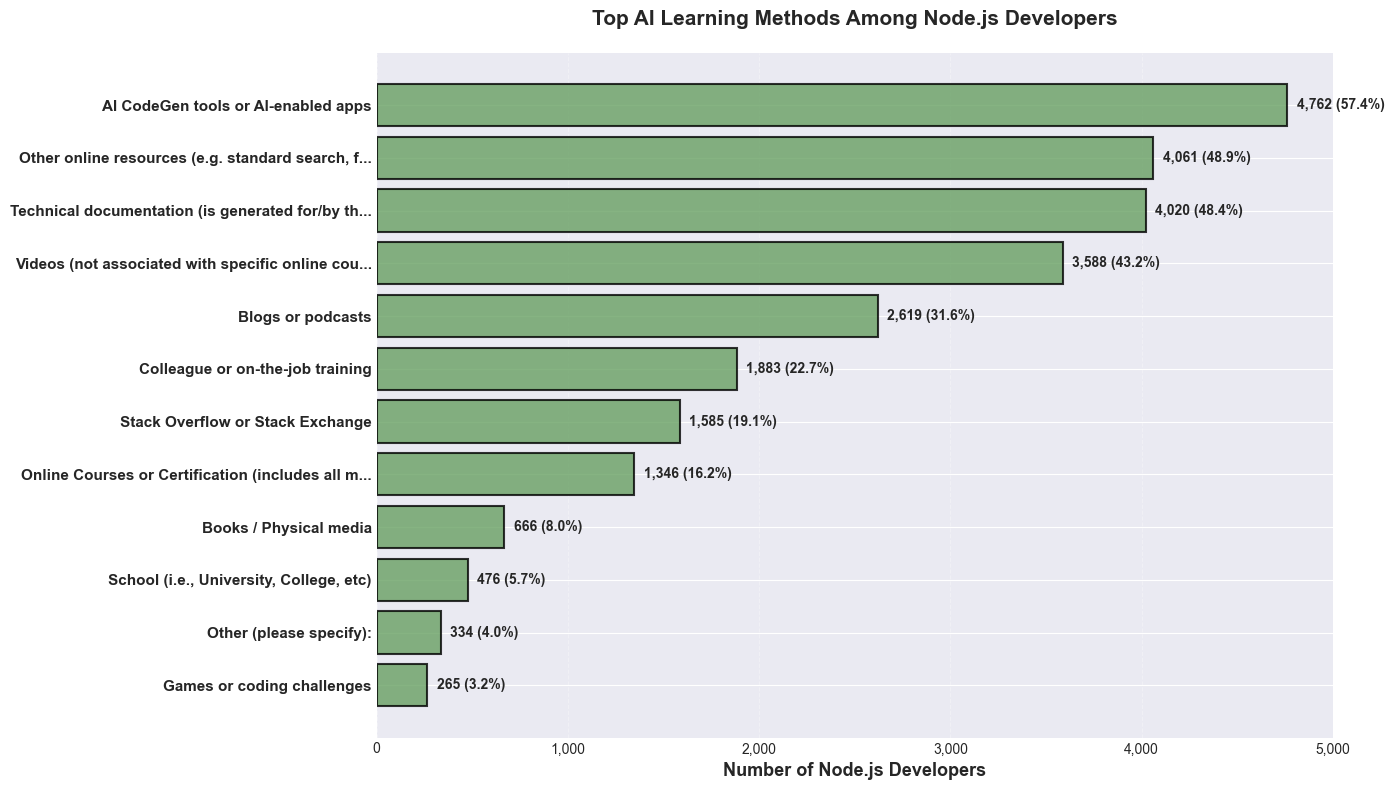

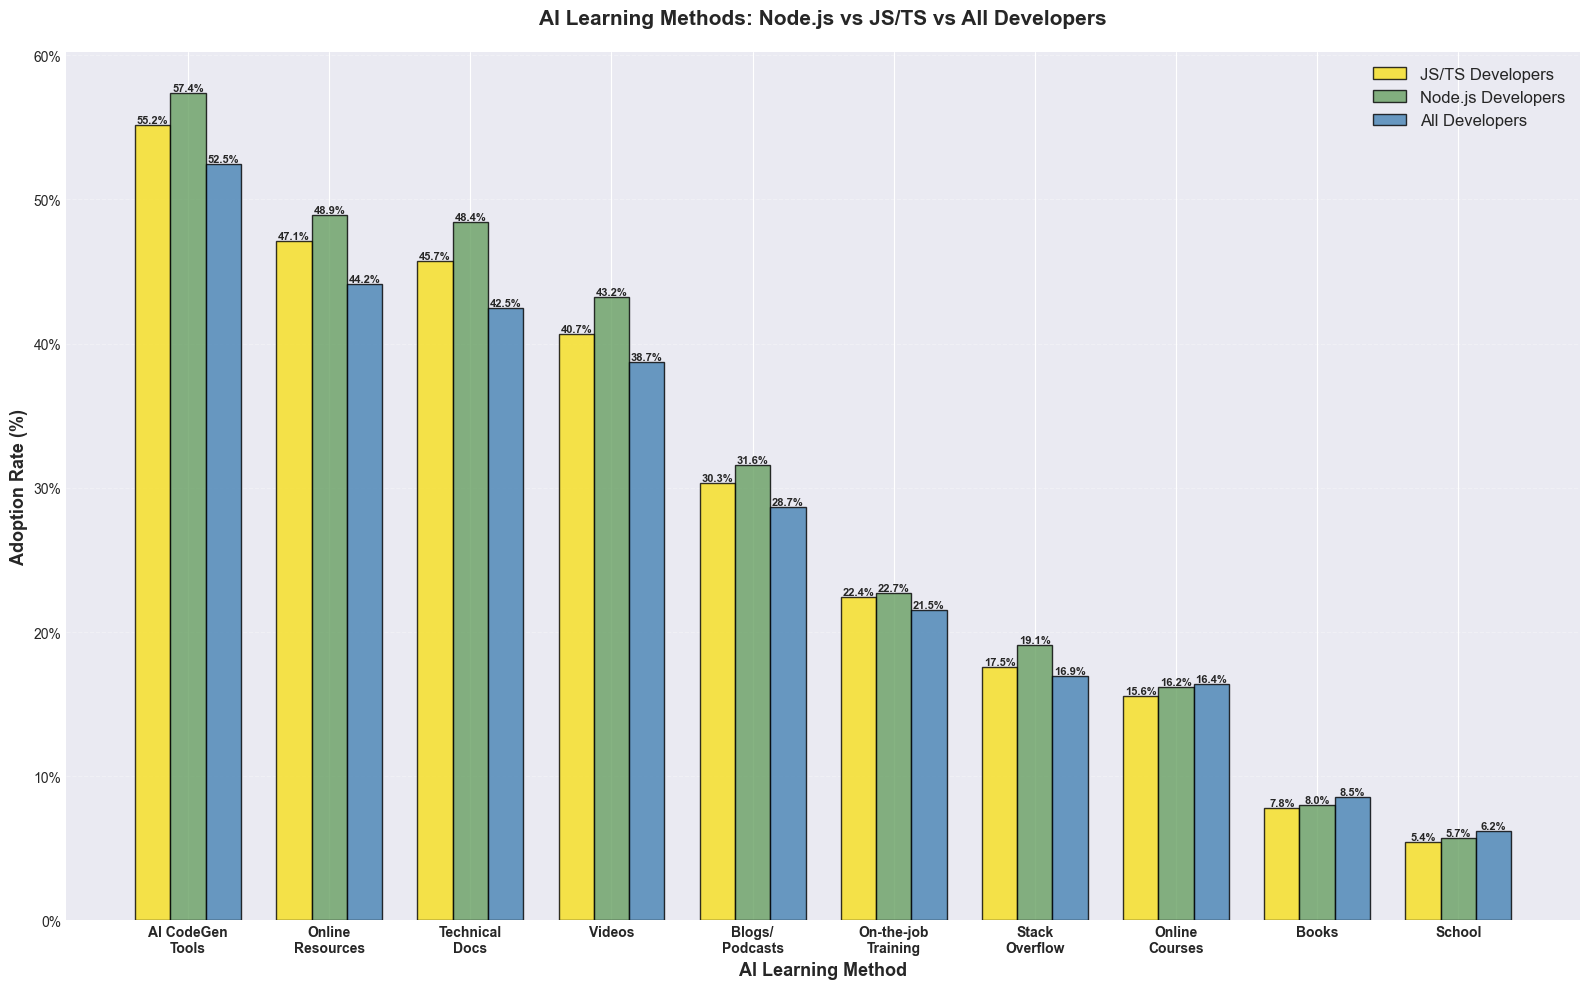

In [124]:
# Analyze AI usage among JS/TS developers
if 'AILearnHow' in df.columns:
    # Parse multi-select AI learning methods for different developer groups
    def parse_ai_learning(developers_df):
        """Parse semicolon-separated AI learning methods"""
        from collections import Counter
        all_methods = []
        for val in developers_df['AILearnHow'].dropna():
            methods = [m.strip() for m in str(val).split(';')]
            all_methods.extend(methods)
        return Counter(all_methods)
    
    # Get AI learning methods for different groups
    js_ts_ai = parse_ai_learning(js_ts_developers)
    nodejs_ai = parse_ai_learning(nodejs_developers)
    all_devs_ai = parse_ai_learning(df)
    
    # Convert to DataFrames for easier manipulation
    js_ts_ai_df = pd.DataFrame(js_ts_ai.most_common(), columns=['Method', 'JS/TS Count'])
    nodejs_ai_df = pd.DataFrame(nodejs_ai.most_common(), columns=['Method', 'Node.js Count'])
    all_ai_df = pd.DataFrame(all_devs_ai.most_common(), columns=['Method', 'All Devs Count'])
    
    # Merge for comparison
    ai_comparison = js_ts_ai_df.merge(nodejs_ai_df, on='Method', how='outer').merge(all_ai_df, on='Method', how='outer').fillna(0)
    ai_comparison = ai_comparison.sort_values('Node.js Count', ascending=False).head(12)
    
    print("\n" + "="*80)
    print("AI Learning Methods - Top 12")
    print("="*80)
    print(ai_comparison.to_string(index=False))
    print("="*80)
    
    # OPTION 1: Top AI Learning Methods (Horizontal Bar Chart)
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Get top 12 for Node.js developers
    top_methods = ai_comparison.head(12)
    y_pos = np.arange(len(top_methods))
    
    # Create horizontal bars
    bars = ax.barh(y_pos, top_methods['Node.js Count'], alpha=0.8, color='#68a063', edgecolor='black', linewidth=1.5)
    
    # Customize
    ax.set_yticks(y_pos)
    # Shorten labels for readability
    short_labels = []
    for method in top_methods['Method']:
        if len(method) > 50:
            short_labels.append(method[:47] + '...')
        else:
            short_labels.append(method)
    ax.set_yticklabels(short_labels, fontsize=11, fontweight='bold')
    ax.invert_yaxis()
    ax.set_xlabel('Number of Node.js Developers', fontsize=13, fontweight='bold')
    ax.set_title('Top AI Learning Methods Among Node.js Developers', fontsize=15, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add value labels with counts and percentages
    total_nodejs = len(nodejs_developers[nodejs_developers['AILearnHow'].notna()])
    for i, (bar, count) in enumerate(zip(bars, top_methods['Node.js Count'])):
        percentage = (count / total_nodejs) * 100
        ax.text(count + 50, bar.get_y() + bar.get_height()/2.,
               f'{int(count):,} ({percentage:.1f}%)',
               va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # OPTION 2: Comparison Between Developer Groups (Grouped Bar Chart)
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Get top 10 for better readability in grouped chart
    top_10 = ai_comparison.head(10)
    x = np.arange(len(top_10))
    width = 0.25
    
    # Calculate percentages for each group
    total_js_ts = len(js_ts_developers[js_ts_developers['AILearnHow'].notna()])
    total_nodejs = len(nodejs_developers[nodejs_developers['AILearnHow'].notna()])
    total_all = len(df[df['AILearnHow'].notna()])
    
    js_ts_pct = (top_10['JS/TS Count'] / total_js_ts * 100).values
    nodejs_pct = (top_10['Node.js Count'] / total_nodejs * 100).values
    all_pct = (top_10['All Devs Count'] / total_all * 100).values
    
    # Create grouped bars
    bars1 = ax.bar(x - width, js_ts_pct, width, label='JS/TS Developers', alpha=0.8, color='#f7df1e', edgecolor='black', linewidth=1)
    bars2 = ax.bar(x, nodejs_pct, width, label='Node.js Developers', alpha=0.8, color='#68a063', edgecolor='black', linewidth=1)
    bars3 = ax.bar(x + width, all_pct, width, label='All Developers', alpha=0.8, color='steelblue', edgecolor='black', linewidth=1)
    
    # Customize
    ax.set_xlabel('AI Learning Method', fontsize=13, fontweight='bold')
    ax.set_ylabel('Adoption Rate (%)', fontsize=13, fontweight='bold')
    ax.set_title('AI Learning Methods: Node.js vs JS/TS vs All Developers', fontsize=15, fontweight='bold', pad=20)
    ax.set_xticks(x)
    # Shorten x-labels
    short_xlabels = []
    for method in top_10['Method']:
        if 'AI CodeGen' in method:
            short_xlabels.append('AI CodeGen\nTools')
        elif 'Other online' in method:
            short_xlabels.append('Online\nResources')
        elif 'Technical doc' in method:
            short_xlabels.append('Technical\nDocs')
        elif 'Videos' in method:
            short_xlabels.append('Videos')
        elif 'Blogs' in method:
            short_xlabels.append('Blogs/\nPodcasts')
        elif 'Colleague' in method:
            short_xlabels.append('On-the-job\nTraining')
        elif 'Stack Overflow' in method:
            short_xlabels.append('Stack\nOverflow')
        elif 'Online Courses' in method:
            short_xlabels.append('Online\nCourses')
        elif 'Books' in method:
            short_xlabels.append('Books')
        elif 'School' in method:
            short_xlabels.append('School')
        else:
            # Truncate long labels
            words = method.split()
            if len(words) > 2:
                short_xlabels.append('\n'.join(words[:2]))
            else:
                short_xlabels.append(method)
    
    ax.set_xticklabels(short_xlabels, fontsize=10, fontweight='bold', ha='center')
    ax.legend(fontsize=12, loc='upper right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
    
    # Add value labels on bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height > 5:  # Only show label if bar is tall enough
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%',
                       ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# AI Usage and Interest Comparison Across Developer Groups
print("\n" + "="*70)
print("🤖 AI Usage & Interest: Node.js vs Python vs Java vs JS vs TS")
print("="*70)

# Define developer groups
nodejs_devs = df[df['WebframeHaveWorkedWith'].str.contains('Node.js', na=False, case=False)]
python_devs = df[df['LanguageHaveWorkedWith'].str.contains('Python', na=False, case=False)]
java_devs = df[df['LanguageHaveWorkedWith'].str.contains('Java', na=False, case=False) & 
               ~df['LanguageHaveWorkedWith'].str.contains('JavaScript', na=False, case=False)]
js_devs = df[df['LanguageHaveWorkedWith'].str.contains('JavaScript', na=False, case=False)]
ts_devs = df[df['LanguageHaveWorkedWith'].str.contains('TypeScript', na=False, case=False)]

groups = {
    'Node.js': nodejs_devs,
    'Python': python_devs,
    'Java': java_devs,
    'JavaScript': js_devs,
    'TypeScript': ts_devs
}

# Calculate metrics for each group
ai_metrics = []

for group_name, group_df in groups.items():
    total = len(group_df)
    
    # Metric 1: Use AI daily
    ai_daily_pct = (len(group_df[group_df['AISelect'] == 'Yes, I use AI tools daily']) / total * 100) if total > 0 else 0
    
    # Metric 2: Plan to use AI soon
    ai_plan_pct = (len(group_df[group_df['AISelect'] == 'No, but I plan to soon']) / total * 100) if total > 0 else 0
    
    # Metric 3: Learned AI for career
    ai_career_pct = (len(group_df[group_df['LearnCodeAI'] == 'Yes, I learned how to use AI-enabled tools required for my job or to benefit my career']) / total * 100) if total > 0 else 0
    
    # Metric 4: Favorable sentiment
    ai_favorable_pct = (len(group_df[group_df['AISent'].isin(['Favorable', 'Very favorable'])]) / total * 100) if total > 0 else 0
    
    ai_metrics.append({
        'Group': group_name,
        'Total': total,
        'Use AI Daily': ai_daily_pct,
        'Plan to Use AI': ai_plan_pct,
        'Learned AI for Career': ai_career_pct,
        'Favorable Sentiment': ai_favorable_pct
    })
    
    print(f"\n{group_name} Developers (n={total:,}):")
    print(f"  ✅ Use AI Daily: {ai_daily_pct:.1f}%")
    print(f"  📅 Plan to Use AI Soon: {ai_plan_pct:.1f}%")
    print(f"  🎓 Learned AI for Career: {ai_career_pct:.1f}%")
    print(f"  😊 Favorable Sentiment: {ai_favorable_pct:.1f}%")

ai_comparison_df = pd.DataFrame(ai_metrics)

print("\n" + "="*70)
print("📊 KEY INSIGHTS:")
print("="*70)
print(f"  • Node.js developers lead in daily AI usage: {ai_comparison_df[ai_comparison_df['Group']=='Node.js']['Use AI Daily'].values[0]:.1f}%")
print(f"  • TypeScript developers are highly engaged: {ai_comparison_df[ai_comparison_df['Group']=='TypeScript']['Use AI Daily'].values[0]:.1f}% daily usage")
print(f"  • Java developers show strong intent: {ai_comparison_df[ai_comparison_df['Group']=='Java']['Plan to Use AI'].values[0]:.1f}% plan to use AI")
print(f"  • Node.js community has most favorable sentiment: {ai_comparison_df[ai_comparison_df['Group']=='Node.js']['Favorable Sentiment'].values[0]:.1f}%")

In [ ]:
# Visualize AI Usage & Interest Comparison
fig, ax = plt.subplots(figsize=(16, 10))

# Prepare data
groups_list = ai_comparison_df['Group'].tolist()
x = np.arange(len(groups_list))
width = 0.2

# Get metrics
daily_usage = ai_comparison_df['Use AI Daily'].values
plan_to_use = ai_comparison_df['Plan to Use AI'].values
learned_career = ai_comparison_df['Learned AI for Career'].values
favorable = ai_comparison_df['Favorable Sentiment'].values

# Create grouped bars
bars1 = ax.bar(x - 1.5*width, daily_usage, width, label='Use AI Daily', 
               alpha=0.9, color='#2ecc71', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x - 0.5*width, plan_to_use, width, label='Plan to Use AI Soon', 
               alpha=0.9, color='#3498db', edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + 0.5*width, learned_career, width, label='Learned AI for Career', 
               alpha=0.9, color='#e74c3c', edgecolor='black', linewidth=1.5)
bars4 = ax.bar(x + 1.5*width, favorable, width, label='Favorable Sentiment', 
               alpha=0.9, color='#f39c12', edgecolor='black', linewidth=1.5)

# Customize
ax.set_xlabel('Developer Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title('AI Usage & Interest Comparison: Node.js vs Python vs Java vs JavaScript vs TypeScript', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(groups_list, fontsize=12, fontweight='bold')
ax.legend(fontsize=11, loc='upper left', framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(daily_usage.max(), favorable.max()) * 1.15)

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        if height > 2:  # Only show label if bar is tall enough
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add sample size annotations
for i, (group, total) in enumerate(zip(groups_list, ai_comparison_df['Total'])):
    ax.text(i, -8, f'n={total:,}', ha='center', fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.show()

print("\n✅ Node.js and TypeScript developers show the highest AI adoption and interest!")
print("✅ This suggests strong demand for AI-powered tools in the JS/TS ecosystem!")

In [125]:
# Check developer types for JS/TS developers
js_ts_dev_types = parse_multi_select(js_ts_developers['DevType'])

print("\nDeveloper types among JS/TS developers:")
for dev_type, count in js_ts_dev_types.most_common(15):
    percentage = (count / len(js_ts_developers)) * 100
    print(f"  {dev_type:40s}: {count:6,} ({percentage:5.1f}%)")


Developer types among JS/TS developers:
  Developer, full-stack                   :  8,475 ( 37.6%)
  Developer, back-end                     :  2,964 ( 13.1%)
  Architect, software or solutions        :  1,535 (  6.8%)
  Student                                 :  1,391 (  6.2%)
  Developer, front-end                    :  1,347 (  6.0%)
  Developer, desktop or enterprise applications:    804 (  3.6%)
  Other (please specify):                 :    785 (  3.5%)
  Engineering manager                     :    589 (  2.6%)
  DevOps engineer or professional         :    473 (  2.1%)
  Developer, mobile                       :    455 (  2.0%)
  Developer, embedded applications or devices:    366 (  1.6%)
  Academic researcher                     :    362 (  1.6%)
  Senior executive (C-suite, VP, etc.)    :    313 (  1.4%)
  Founder, technology or otherwise        :    265 (  1.2%)
  Data engineer                           :    250 (  1.1%)


## 8. What Attracts Developers to Technology?

In [ ]:
# Analyze what attracts JS/TS developers to technology
tech_endorse_cols = [col for col in df.columns if col.startswith('TechEndorse_') and not col.endswith('TEXT')]

# Get the schema information for these columns
tech_endorse_schema = schema[schema['qname'].str.startswith('TechEndorse_')]
print("\nWhat attracts developers to technology (from schema):")
print(tech_endorse_schema[['qname', 'sub']].drop_duplicates())

## 9. Comparative Analysis: JS/TS vs Python Developers

In [ ]:
# Compare JS/TS developers with Python developers (RedisVL already exists for Python)
python_mask = df['LanguageHaveWorkedWith'].str.contains('Python', na=False)
python_developers = df[python_mask]
python_redis_developers = df[python_mask & redis_mask]

print(f"\n{'='*60}")
print("JS/TS vs Python: Market Comparison")
print(f"{'='*60}")
print(f"\nJavaScript/TypeScript:")
print(f"  Total developers: {len(js_ts_developers):,}")
print(f"  Using Redis: {len(js_ts_redis_developers):,} ({len(js_ts_redis_developers)/len(js_ts_developers)*100:.1f}%)")
print(f"\nPython:")
print(f"  Total developers: {len(python_developers):,}")
print(f"  Using Redis: {len(python_redis_developers):,} ({len(python_redis_developers)/len(python_developers)*100:.1f}%)")
print(f"\nMarket Size Comparison:")
print(f"  JS/TS market is {len(js_ts_developers)/len(python_developers):.2f}x the size of Python market")
print(f"  JS/TS + Redis market is {len(js_ts_redis_developers)/len(python_redis_developers):.2f}x the Python + Redis market")
print(f"{'='*60}")

In [ ]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Total developers
languages = ['JavaScript/TypeScript', 'Python']
total_devs = [len(js_ts_developers), len(python_developers)]
redis_devs = [len(js_ts_redis_developers), len(python_redis_developers)]

x = np.arange(len(languages))
width = 0.35

axes[0].bar(x - width/2, total_devs, width, label='Total Developers', alpha=0.8)
axes[0].bar(x + width/2, redis_devs, width, label='Using Redis', alpha=0.8)
axes[0].set_ylabel('Number of Developers', fontsize=12)
axes[0].set_title('Developer Count Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(languages)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Chart 2: Redis adoption rate
redis_adoption = [
    len(js_ts_redis_developers)/len(js_ts_developers)*100,
    len(python_redis_developers)/len(python_developers)*100
]

axes[1].bar(languages, redis_adoption, color=['#f7df1e', '#3776ab'], alpha=0.8)
axes[1].set_ylabel('Redis Adoption Rate (%)', fontsize=12)
axes[1].set_title('Redis Adoption Rate by Language', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(redis_adoption):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Database Preferences of JS/TS Developers

In [ ]:
# What databases do JS/TS developers use?
js_ts_db_usage = parse_multi_select(js_ts_developers['DatabaseHaveWorkedWith'])
js_ts_db_want = parse_multi_select(js_ts_developers['DatabaseWantToWorkWith'])

js_ts_db_df = pd.DataFrame([
    {
        'Database': db, 
        'Currently Use': count,
        'Want to Use': js_ts_db_want.get(db, 0),
        'Usage %': (count / len(js_ts_developers[js_ts_developers['DatabaseHaveWorkedWith'].notna()])) * 100
    }
    for db, count in js_ts_db_usage.most_common(15)
])

print("\nTop 15 Databases Used by JS/TS Developers:")
print(js_ts_db_df.to_string(index=False))

In [ ]:
# Visualize JS/TS database preferences with grouped bar chart
fig, ax = plt.subplots(figsize=(16, 10))

# Take top 12 databases for better readability
top_dbs = js_ts_db_df.head(12)
x = np.arange(len(top_dbs))
width = 0.35

# Create grouped bars for 'Currently Use' and 'Want to Use'
bars1 = ax.bar(x - width/2, top_dbs['Currently Use'], width, label='Currently Use', alpha=0.8, color='steelblue', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, top_dbs['Want to Use'], width, label='Want to Use', alpha=0.8, color='coral', edgecolor='black', linewidth=1)

ax.set_xlabel('Database', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Developers', fontsize=13, fontweight='bold')
ax.set_title('Top Databases: Current Usage vs Interest Among JS/TS Developers', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(top_dbs['Database'], rotation=45, ha='right', fontsize=11, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{int(height):,}',
               ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add Redis highlight
redis_idx = top_dbs[top_dbs['Database'] == 'Redis'].index[0] if 'Redis' in top_dbs['Database'].values else None
if redis_idx is not None:
    redis_pos = top_dbs.index.get_loc(redis_idx)
    ax.axvspan(redis_pos - 0.5, redis_pos + 0.5, alpha=0.1, color='green', label='Redis (Target DB)')

plt.tight_layout()
plt.show()

## 11. Final Recommendation: Should You Build RedisVL for TypeScript/JavaScript?

In [ ]:
# Calculate key metrics for decision making
total_survey_responses = len(df)
js_ts_percentage = (len(js_ts_developers) / total_survey_responses) * 100
python_percentage = (len(python_developers) / total_survey_responses) * 100
nodejs_percentage = (len(nodejs_developers) / total_survey_responses) * 100
js_ts_redis_percentage = (len(js_ts_redis_developers) / len(js_ts_developers)) * 100
nodejs_redis_percentage = (len(nodejs_redis_developers) / len(nodejs_developers)) * 100

print("\n" + "="*80)
print(" " * 15 + "🎯 EXECUTIVE SUMMARY: RedisVL for TypeScript/JavaScript")
print("="*80)

print("\n📊 OVERALL MARKET SIZE:")
print(f"  • Total survey respondents: {total_survey_responses:,}")
print(f"  • JavaScript/TypeScript developers: {len(js_ts_developers):,} ({js_ts_percentage:.1f}%)")
print(f"  • Node.js developers (backend): {len(nodejs_developers):,} ({nodejs_percentage:.1f}%)")
print(f"  • Python developers: {len(python_developers):,} ({python_percentage:.1f}%)")

print("\n🎯 PRIMARY TARGET MARKET (Node.js + Redis):")
print(f"  • Node.js developers using Redis: {len(nodejs_redis_developers):,}")
print(f"  • Redis adoption among Node.js devs: {nodejs_redis_percentage:.1f}%")
print(f"  • Python developers using Redis: {len(python_redis_developers):,}")
print(f"  • Node.js + Redis market is {len(nodejs_redis_developers)/len(python_redis_developers):.2f}x the Python + Redis market")

print("\n📈 BROADER MARKET (All JS/TS + Redis):")
print(f"  • All JS/TS developers using Redis: {len(js_ts_redis_developers):,}")
print(f"  • Redis adoption among JS/TS devs: {js_ts_redis_percentage:.1f}%")
print(f"  • JS/TS + Redis market is {len(js_ts_redis_developers)/len(python_redis_developers):.2f}x the Python + Redis market")

print("\n💡 KEY INSIGHTS:")
print(f"  • JavaScript is the #{list(languages_worked.keys()).index('JavaScript') + 1} most used language")
print(f"  • TypeScript is the #{list(languages_worked.keys()).index('TypeScript') + 1} most used language")
nodejs_rank = list(webframe_worked.keys()).index('Node.js') + 1 if 'Node.js' in webframe_worked else 'N/A'
print(f"  • Node.js is the #{nodejs_rank} most used web framework/platform")
redis_rank = list(databases_worked.keys()).index('Redis') + 1 if 'Redis' in databases_worked else 'N/A'
print(f"  • Redis is the #{redis_rank} most used database")
nodejs_redis_db_rank = list(nodejs_redis_dbs.keys()).index('Redis') + 1 if 'Redis' in nodejs_redis_dbs else 'N/A'
print(f"  • Among Node.js developers, Redis ranks #{nodejs_redis_db_rank} in database usage")

print("\n✅ RECOMMENDATION:")
if len(nodejs_redis_developers) > len(python_redis_developers) * 0.5:
    print("  🚀 STRONGLY RECOMMENDED: Build the TypeScript/JavaScript RedisVL client library")
    print("\n  Reasons:")
    print(f"    1. Large PRIMARY target market: {len(nodejs_redis_developers):,} Node.js + Redis developers")
    print(f"    2. BROADER market potential: {len(js_ts_redis_developers):,} JS/TS + Redis developers")
    print(f"    3. Node.js + Redis market is {len(nodejs_redis_developers)/len(python_redis_developers):.2f}x Python + Redis")
    print(f"    4. High Redis adoption in Node.js community ({nodejs_redis_percentage:.1f}%)")
    print(f"    5. Node.js is the #{nodejs_rank} most popular web framework")
else:
    print("  ⚠️  PROCEED WITH CAUTION: Market size may be limited")

print("\n🎯 TARGET PERSONAS (Node.js + Redis):")
for i, (dev_type, count) in enumerate(nodejs_redis_dev_types.most_common(5), 1):
    percentage = (count / len(nodejs_redis_developers)) * 100
    print(f"  {i}. {dev_type}: {count:,} ({percentage:.1f}%)")

print("\n📈 GROWTH OPPORTUNITIES:")
nodejs_want_redis = df[nodejs_mask & df['DatabaseWantToWorkWith'].str.contains('Redis', na=False, case=False)]
print(f"  • Node.js developers who want to work with Redis: {len(nodejs_want_redis):,}")
print(f"  • Growing AI/ML adoption in Node.js ecosystem")
print(f"  • Vector databases becoming mainstream for RAG applications")

print("\n" + "="*80)

## 12. Summary Dashboard: Complete Market Overview

In [ ]:
# Summary statistics for the dashboard
print("\n" + "="*80)
print(" " * 25 + "📊 COMPLETE MARKET OVERVIEW")
print("="*80)
print(f"\nTotal Survey Responses: {total_survey_responses:,}")
print(f"\nLanguage Markets:")
print(f"  • JavaScript/TypeScript: {len(js_ts_developers):,} ({js_ts_percentage:.1f}%)")
print(f"  • Python: {len(python_developers):,} ({python_percentage:.1f}%)")
print(f"\nBackend Framework Markets:")
print(f"  • Node.js: {len(nodejs_developers):,} ({nodejs_percentage:.1f}%)")
print(f"\nRedis Adoption:")
print(f"  • Node.js + Redis: {len(nodejs_redis_developers):,} ({nodejs_redis_percentage:.1f}% of Node.js devs)")
print(f"  • JS/TS + Redis: {len(js_ts_redis_developers):,} ({js_ts_redis_percentage:.1f}% of JS/TS devs)")
print(f"  • Python + Redis: {len(python_redis_developers):,} ({len(python_redis_developers)/len(python_developers)*100:.1f}% of Python devs)")
print("="*80)

In [ ]:
# Create a comprehensive summary visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Market size comparison - NOW INCLUDING NODE.JS
ax1 = fig.add_subplot(gs[0, 0])
market_data = pd.DataFrame({
    'Segment': ['JS/TS\nTotal', 'Node.js\nTotal', 'Python\nTotal', 'Node.js\n+Redis', 'Python\n+Redis'],
    'Count': [len(js_ts_developers), len(nodejs_developers), len(python_developers), 
              len(nodejs_redis_developers), len(python_redis_developers)],
    'Color': ['#f7df1e', '#68a063', '#3776ab', '#dc382d', '#4b8bbe']
})
bars = ax1.bar(market_data['Segment'], market_data['Count'], color=market_data['Color'], alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Number of Developers', fontsize=12, fontweight='bold')
ax1.set_title('Market Size Comparison', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels\nfor bar in bars:\n    height = bar.get_height()\n    ax1.text(bar.get_x() + bar.get_width()/2., height,\n            f'{int(height):,}',\n            ha='center', va='bottom', fontsize=9, fontweight='bold')\n\n# 2. Redis adoption rates - NOW INCLUDING NODE.JS\nax2 = fig.add_subplot(gs[0, 1])
adoption_categories = ['JS/TS', 'Node.js', 'Python']
adoption_rates = [
    js_ts_redis_percentage,
    nodejs_redis_percentage,
    (len(python_redis_developers)/len(python_developers))*100
]
bars = ax2.bar(adoption_categories, adoption_rates, color=['#f7df1e', '#68a063', '#3776ab'], 
               alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Redis Adoption Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Redis Adoption Rate by Platform', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, max(adoption_rates) * 1.2)

for bar, v in zip(bars, adoption_rates):
    ax2.text(bar.get_x() + bar.get_width()/2., v + 1, 
            f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 3. Node.js + Redis tech stack (top languages)
ax3 = fig.add_subplot(gs[0, 2])
top_nodejs_langs = pd.DataFrame([
    {'Language': lang, 'Percentage': (count/len(nodejs_redis_developers))*100}
    for lang, count in nodejs_redis_langs.most_common(8)
])
ax3.barh(range(len(top_nodejs_langs)), top_nodejs_langs['Percentage'], alpha=0.8, color='steelblue')
ax3.set_yticks(range(len(top_nodejs_langs)))
ax3.set_yticklabels(top_nodejs_langs['Language'])
ax3.invert_yaxis()
ax3.set_xlabel('Usage (%)', fontsize=11, fontweight='bold')
ax3.set_title('Languages Used by Node.js + Redis Devs', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Node.js + Redis databases
ax4 = fig.add_subplot(gs[1, 0])
top_nodejs_dbs = pd.DataFrame([
    {'Database': db, 'Percentage': (count/len(nodejs_redis_developers))*100}
    for db, count in nodejs_redis_dbs.most_common(8)
])
ax4.barh(range(len(top_nodejs_dbs)), top_nodejs_dbs['Percentage'], alpha=0.8, color='coral')
ax4.set_yticks(range(len(top_nodejs_dbs)))
ax4.set_yticklabels(top_nodejs_dbs['Database'])
ax4.invert_yaxis()
ax4.set_xlabel('Usage (%)', fontsize=11, fontweight='bold')
ax4.set_title('Databases Used by Node.js + Redis Devs', fontsize=13, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# 5. Node.js + Redis developer roles
ax5 = fig.add_subplot(gs[1, 1])
top_nodejs_roles = pd.DataFrame([
    {'Role': role, 'Count': count}
    for role, count in nodejs_redis_dev_types.most_common(8)
])
ax5.barh(range(len(top_nodejs_roles)), top_nodejs_roles['Count'], alpha=0.8, color='mediumseagreen')
ax5.set_yticks(range(len(top_nodejs_roles)))
ax5.set_yticklabels(top_nodejs_roles['Role'], fontsize=9)
ax5.invert_yaxis()
ax5.set_xlabel('Number of Developers', fontsize=11, fontweight='bold')
ax5.set_title('Developer Roles (Node.js + Redis)', fontsize=13, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# 6. Market comparison pie chart
ax6 = fig.add_subplot(gs[1, 2])
market_segments = ['Node.js\n+Redis', 'Python\n+Redis', 'Other JS/TS\n+Redis']
market_values = [
    len(nodejs_redis_developers),
    len(python_redis_developers),
    len(js_ts_redis_developers) - len(nodejs_redis_developers)
]
colors_pie = ['#68a063', '#3776ab', '#f7df1e']
explode = (0.1, 0, 0)

wedges, texts, autotexts = ax6.pie(market_values, labels=market_segments, autopct='%1.1f%%',
                                    colors=colors_pie, explode=explode, startangle=90,
                                    textprops={'fontsize': 10, 'fontweight': 'bold'})
ax6.set_title('Redis User Distribution', fontsize=13, fontweight='bold')

plt.suptitle('🎯 RedisVL Market Analysis: Node.js + Redis is the Primary Target', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 13. Export Key Findings

In [126]:
# Create a comprehensive summary report
summary_report = f"""
REDISVL TYPESCRIPT/JAVASCRIPT CLIENT LIBRARY - MARKET ANALYSIS REPORT
Stack Overflow Developer Survey 2025
{'='*80}

EXECUTIVE SUMMARY:
Based on the analysis of {total_survey_responses:,} developer responses, there is a 
STRONG MARKET OPPORTUNITY for building a TypeScript/JavaScript version of RedisVL.

The PRIMARY target market is Node.js developers, as they work on backend/server-side
applications where RedisVL would be most applicable.

KEY FINDINGS:

1. OVERALL MARKET SIZE:
   - JavaScript/TypeScript developers: {len(js_ts_developers):,} ({js_ts_percentage:.1f}% of all developers)
   - Node.js developers (backend): {len(nodejs_developers):,} ({nodejs_percentage:.1f}% of all developers)
   - Python developers: {len(python_developers):,} ({python_percentage:.1f}% of all developers)

2. PRIMARY TARGET MARKET (Node.js + Redis):
   - Node.js developers using Redis: {len(nodejs_redis_developers):,}
   - Redis adoption rate among Node.js developers: {nodejs_redis_percentage:.1f}%
   - Node.js + Redis market is {len(nodejs_redis_developers)/len(python_redis_developers):.2f}x the Python + Redis market

3. BROADER MARKET (All JS/TS + Redis):
   - All JS/TS developers using Redis: {len(js_ts_redis_developers):,}
   - Redis adoption rate among JS/TS developers: {js_ts_redis_percentage:.1f}%
   - JS/TS + Redis market is {len(js_ts_redis_developers)/len(python_redis_developers):.2f}x the Python + Redis market

4. TECHNOLOGY RANKINGS:
   - JavaScript: #{list(languages_worked.keys()).index('JavaScript') + 1} most used language
   - TypeScript: #{list(languages_worked.keys()).index('TypeScript') + 1} most used language
   - Node.js: #{nodejs_rank} most used web framework/platform
   - Redis: #{redis_rank} most used database overall
   - Redis among Node.js devs: #{nodejs_redis_db_rank} most used database

5. PRIMARY TARGET PERSONAS (Node.js + Redis):
"""

for i, (dev_type, count) in enumerate(nodejs_redis_dev_types.most_common(5), 1):
    percentage = (count / len(nodejs_redis_developers)) * 100
    summary_report += f"   {i}. {dev_type}: {count:,} developers ({percentage:.1f}%)\n"

summary_report += f"""

6. TECHNOLOGY STACK (Node.js + Redis developers use):
   Top Languages:
"""

for i, (lang, count) in enumerate(nodejs_redis_langs.most_common(5), 1):
    percentage = (count / len(nodejs_redis_developers)) * 100
    summary_report += f"     {i}. {lang}: {percentage:.1f}%\n"

summary_report += f"""
   Top Databases:
"""

for i, (db, count) in enumerate(nodejs_redis_dbs.most_common(5), 1):
    percentage = (count / len(nodejs_redis_developers)) * 100
    summary_report += f"     {i}. {db}: {percentage:.1f}%\n"

summary_report += f"""

RECOMMENDATION:
✅ STRONGLY RECOMMENDED: BUILD THE TYPESCRIPT/JAVASCRIPT REDISVL CLIENT LIBRARY

Rationale:
1. Large PRIMARY target market: {len(nodejs_redis_developers):,} Node.js + Redis developers
2. BROADER market potential: {len(js_ts_redis_developers):,} JS/TS + Redis developers
3. Node.js + Redis market is {len(nodejs_redis_developers)/len(python_redis_developers):.2f}x larger than Python + Redis
4. High Redis adoption in Node.js community ({nodejs_redis_percentage:.1f}%)
5. Node.js is the #{nodejs_rank} most popular web framework/platform
6. Growing AI/ML adoption in the Node.js ecosystem

NEXT STEPS:
1. Focus on Node.js/TypeScript as the primary platform (not browser JavaScript)
2. Prioritize API design for ease of use and developer experience
3. Implement TypeScript-first development for type safety
4. Target backend developers, full-stack developers, and DevOps engineers
5. Provide comprehensive documentation with Node.js-specific examples
6. Highlight vector search and RAG use cases for AI/ML applications
7. Ensure compatibility with popular Node.js frameworks (Express, NestJS, Next.js)
8. Consider async/await patterns and Promise-based APIs (Node.js conventions)

MARKET OPPORTUNITY:
The Node.js + Redis market represents a significant opportunity that is LARGER than
the existing Python + Redis market. With {len(nodejs_redis_developers):,} developers already
using both technologies, there is clear demand for a high-quality RedisVL client library.

{'='*80}
Report generated from Stack Overflow Developer Survey 2025 analysis
Analysis Date: 2026-02-06
"""

print(summary_report)

# Save to file
with open('survey-data/redisvl_market_analysis_summary.txt', 'w') as f:
    f.write(summary_report)
    
print("\n✅ Summary report saved to: survey-data/redisvl_market_analysis_summary.txt")


REDISVL TYPESCRIPT/JAVASCRIPT CLIENT LIBRARY - MARKET ANALYSIS REPORT
Stack Overflow Developer Survey 2025

EXECUTIVE SUMMARY:
Based on the analysis of 49,191 developer responses, there is a 
STRONG MARKET OPPORTUNITY for building a TypeScript/JavaScript version of RedisVL.

The PRIMARY target market is Node.js developers, as they work on backend/server-side
applications where RedisVL would be most applicable.

KEY FINDINGS:

1. OVERALL MARKET SIZE:
   - JavaScript/TypeScript developers: 22,557 (45.9% of all developers)
   - Node.js developers (backend): 11,544 (23.5% of all developers)
   - Python developers: 18,466 (37.5% of all developers)

2. PRIMARY TARGET MARKET (Node.js + Redis):
   - Node.js developers using Redis: 3,734
   - Redis adoption rate among Node.js developers: 32.3%
   - Node.js + Redis market is 0.80x the Python + Redis market

3. BROADER MARKET (All JS/TS + Redis):
   - All JS/TS developers using Redis: 6,138
   - Redis adoption rate among JS/TS developers: 27.2%
